# Clone the repo
### (For use in colab)
[![Open in Colaboratory](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rizerphe/dev_datasets_analysis_project/blob/main/notebook.ipynb)

In [ ]:
!git clone --recursive https://github.com/rizerphe/dev_datasets_analysis_project.git
%cd dev_datasets_analysis_project
!python download_stackoverflow.py

# Load the dataset

In [1]:
import pandas as pd
import numpy as np

In [63]:
dec_2021 = pd.read_csv('./csv/salaries/2021_dec_raw.csv', delimiter=';')
dec_2021.columns

Index(['Timestamp', 'Ви працюєте зараз в ІТ?', 'Де ви мешкаєте?',
       'Де ви працюєте?', 'Ваша стать', 'Ваш вік', 'Яка у вас освіта?',
       'Чи є у вас науковий ступінь? ', 'Знання англійської мови',
       'Оберіть вашу посаду', 'Ваш тайтл', 'Ваш тайтл.1',
       'Вкажіть вашу спеціалізацію', 'Оберіть вашу посаду.1', 'Ваш тайтл.2',
       'Ваша посада', 'Ваш тайтл.3', 'Оберіть вашу посаду.2', 'Ваш тайтл.4',
       'Ваша посада.1', 'Ваш тайтл.5', 'Ваша посада.2', 'Ваш тайтл.6',
       'Ваша посада.3', 'Ваш тайтл.7', 'Ваша посада.4', 'Ваш тайтл.8',
       'Ваш тайтл.9', 'Ваша посада.5',
       'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?',
       'Основна мова програмування', 'Інші мови програмування',
       'Платформи, для яких розробляєте на поточному місці роботи?',
       'Вкажіть вашу основну спеціалізацію', 'В якій сфері працюєте?',
       'Тип компанії', 'Кількість спеціалістів у вашій компанії (в Україні)',
       'Загальний стаж роботи в ІТ'

In [54]:
dec_2021_devs = dec_2021[dec_2021['Оберіть вашу посаду'] == 'Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)']
dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'] = dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'].astype(int)
dec_2021_devs = dec_2021_devs.dropna(subset=['Зарплата у $$$ за місяць, лише ставка після сплати податків'])
dec_2021_devs

C:\Users\Victor\AppData\Local\Temp\ipykernel_14404\333639481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'] = dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'].astype(int)


,Timestamp,Ви працюєте зараз в ІТ?,Де ви мешкаєте?,Де ви працюєте?,Ваша стать,Ваш вік,Яка у вас освіта?,Чи є у вас науковий ступінь?,Знання англійської мови,Оберіть вашу посаду,...,Тип компанії,Кількість спеціалістів у вашій компанії (в Україні),Загальний стаж роботи в ІТ,Загальний стаж роботи за спеціальністю,У скількох компаніях встигли попрацювати за час ІТ-кар'єри?,"Зарплата у $$$ за місяць, лише ставка після сплати податків",Наскільки змінилась ваша зарплата за останні 12 місяців?,"Ставка у $$$ за годину, яку ви виставляєте клієнтам",Чи отримуєте ви грошові бонуси до зарплати?,Вкажіть суму цього бонуса у $$$ після податків
6187,11/30/2021 16:50:41,"Так, працюю full-time",Дніпро,Віддалено,Чоловік,33,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутстафінгова,до 1000,10 і більше років,10 і більше років,5–7,18000,5600,NaN,"Отримую бонус за гарні показники роботи, але н...",NaN
6188,11/29/2021 12:20:22,"Так, працюю full-time",Львів,"Частково віддалено, частково в офісі",Чоловік,29,"Вища (бакалавр, спеціаліст, магістр)",Доктор наук,Upper-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутсорсингова,понад 1000,10 і більше років,5 років,5–7,16800,2400,145,"Ні, не отримую",NaN
6189,11/30/2021 11:36:42,"Так, працюю full-time",Львів,"Частково віддалено, частково в офісі",Чоловік,33,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",...,Продуктова,до 50,10 і більше років,10 і більше років,5–7,15250,9250,NaN,"Отримую бонус за гарні показники роботи, але н...",2500
6190,12.05.2021 19:37,"Так, працюю full-time",Харків,Віддалено,Чоловік,35,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутсорсингова,до 1000,8 років,4 роки,8 і більше,15000,5000,NaN,Отримую бонус щомісяця,2000
6191,11/29/2021 11:00:54,"Так, працюю full-time",Київ,Віддалено,Чоловік,34,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",...,Продуктова,до 50,10 і більше років,10 і більше років,NaN,14300,5530,55,"Ні, не отримую",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14187,12/15/2021 11:35:02,"Так, працюю full-time",Вінниця,В офісі,Жінка,20,Ще студент вишу,Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутстафінгова,до 200,Пів року,Пів року,1,100,any changes,NaN,"Ні, не отримую",NaN
14188,12.12.2021 17:30,"Так, працюю full-time",Вінниця,В офісі,Чоловік,25,"Вища (бакалавр, спеціаліст, магістр)",Немає,Pre-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Продуктова,до 200,Менше як 3 місяці,Пів року,2,100,100,NaN,"Ні, не отримую",NaN
14189,12/15/2021 15:14:29,"Так, працюю full-time",Київ,Віддалено,Чоловік,35,"Вища (бакалавр, спеціаліст, магістр)",Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Стартап,Лише я,Менше як 3 місяці,Менше як 3 місяці,1,100,10,1,"Ні, не отримую",0
14190,12/16/2021 16:12:48,"Так, працюю full-time",Київ,Віддалено,Чоловік,18,Середня спеціальна,Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Стартап,до 10 спеціалістів,Пів року,Пів року,1,100,0,NaN,"Отримую бонус за гарні показники роботи, але н...",50


# Середня зарплата програміста

In [55]:
dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean()

3463.350156152405

In [56]:
dec_2021_devs['Де ви мешкаєте?'].value_counts()

Київ                3376
Львів               1133
Харків              1039
Дніпро               449
Одеса                410
Вінниця              233
Інше                 218
Івано-Франківськ     163
Запоріжжя            105
Чернівці             103
Тернопіль             88
Черкаси               79
Хмельницький          76
Миколаїв              74
Рівне                 60
Полтава               54
Житомир               53
Суми                  50
Чернігів              49
Луцьк                 46
Ужгород               41
Херсон                35
Кропивницький         33
Кривий Ріг            20
Маріуполь             18
Name: Де ви мешкаєте?, dtype: int64

In [61]:
dec_2021_devs.set_index('Де ви мешкаєте?').groupby('Де ви мешкаєте?')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean().sort_values(ascending=False)

Де ви мешкаєте?
Київ                3822.633294
Львів               3549.886143
Одеса               3451.226829
Дніпро              3338.937639
Харків              3330.210780
Вінниця             3067.253219
Івано-Франківськ    3049.858896
Маріуполь           2959.444444
Ужгород             2894.024390
Тернопіль           2846.272727
Чернігів            2810.612245
Інше                2805.766055
Суми                2766.200000
Херсон              2732.257143
Черкаси             2726.455696
Миколаїв            2681.216216
Житомир             2661.490566
Рівне               2660.916667
Запоріжжя           2645.476190
Хмельницький        2630.105263
Луцьк               2611.739130
Полтава             2590.833333
Чернівці            2396.902913
Кривий Ріг          2343.450000
Кропивницький       1791.818182
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64

In [62]:
dec_2021_devs['Де ви працюєте?'].value_counts()

Віддалено                               4709
Частково віддалено, частково в офісі    2190
В офісі                                  982
Name: Де ви працюєте?, dtype: int64

In [64]:
dec_2021_devs['Загальний стаж роботи в ІТ'].value_counts()

10 і більше років    1700
3 роки                870
5 років               869
4 роки                776
6 років               690
2 роки                605
7 років               522
1 рік                 408
8 років               404
1,5 року              338
Пів року              321
9 років               318
Менше як 3 місяці      94
3 місяці               90
Name: Загальний стаж роботи в ІТ, dtype: int64

In [73]:
import matplotlib.pyplot as plt

In [88]:
import math

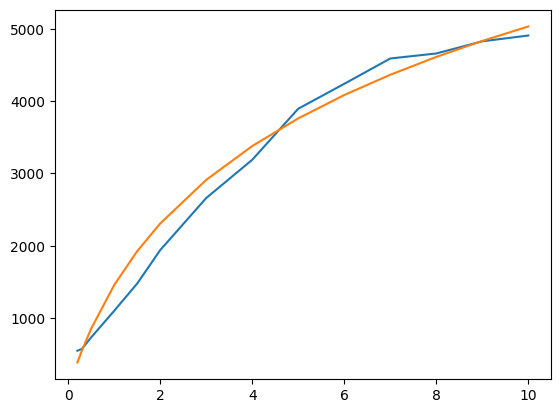

In [52]:
data = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean().sort_values()

index = [0.2, 0.3, 0.5, 1, 1.5] + list(range(2, 11))

sub = plt.subplot()
sub.plot(index, data)
sub.plot(index, [2100 * math.log(x + 1) for x in index])

# Stack overflow survey analysis

In [45]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 4.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 7.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.0 MB/s eta 0:00:0000:0100:01


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
dataset = pd.read_csv('./stack-overflow-developer-survey-2022/survey_results_public.csv', delimiter=',')

In [ ]:
dataset.columns

In [49]:
converter = {
    "More than 50 years": 51,
    "Less than 1 year": 0.5,
}

def summarize_salary_per_experience(dataset):
    data = dataset.dropna(subset=['ConvertedCompYearly']).groupby('YearsCode')['ConvertedCompYearly']

    devs_per_years = []
    index = sorted(dataset['YearsCode'].dropna().unique(), key=lambda x: float(converter.get(x, x)))
    for x in index:
        y = dataset[dataset["YearsCode"] == x]["ConvertedCompYearly"].dropna().shape[0]
        devs_per_years.append(y)

    print("Developers per year of experience")
    plt.plot([converter.get(x, x) for x in index], devs_per_years)
    plt.show()

    print("Salary per year of experience")
    data = data.median()
    plt.plot([converter.get(x, x) for x in data.index], data)
    plt.show()

In [56]:
def lower_res(years):
    i = float(converter.get(years, years))
    if i <= 10:
        return i
    return 11


def crop_dataset(dataset):
    dataset_cropped = dataset.dropna(subset=["YearsCode"])
    dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)
    dataset_cropped = dataset_cropped[dataset_cropped["YearsCode - Less detailed"] < 11]
    return dataset_cropped

In [51]:
def build_graph(sub: plt.subplot, dataset_cropped, label=None):
    print(label, "-", dataset_cropped.shape[0], "responses")

    devs_per_years = []
    index = sorted(dataset_cropped['YearsCode - Less detailed'].dropna().unique())
    for x in index:
        y = dataset_cropped[dataset_cropped["YearsCode - Less detailed"] == x]["ConvertedCompYearly"].dropna().median()
        devs_per_years.append(y)

    sub.plot([converter.get(x, x) for x in index], devs_per_years, label=label)

In [52]:
def filter_by_language(dataset, language):
    bool_index = dataset["LanguageHaveWorkedWith"].str.contains(language, regex=False)
    na_index = bool_index.notna()
    return dataset[na_index][bool_index.dropna()]

def n_devs(dataset, language):
    return sum(dataset["LanguageHaveWorkedWith"].str.contains(language, regex=False).dropna())

def get_most_popular_languages(dataset):
    languages = set().union(*(set(x.split(";")) for x in dataset["LanguageHaveWorkedWith"].dropna().unique()))
    return sorted(languages, key=lambda language: n_devs(dataset, language), reverse=True)

In [53]:
dataset_2022 = pd.read_csv('./stack-overflow-developer-survey-2022/survey_results_public.csv', delimiter=',')
dataset_2021 = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_public.csv', delimiter=',')

/var/folders/p2/7kxcgmtx2t19yg6vq8h0bml40000gn/T/ipykernel_15970/87522081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)
/var/folders/p2/7kxcgmtx2t19yg6vq8h0bml40000gn/T/ipykernel_15970/87522081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)


C
35724
31347


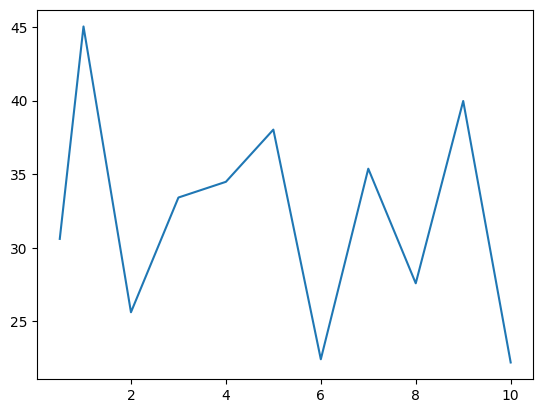

Java
35184
31411


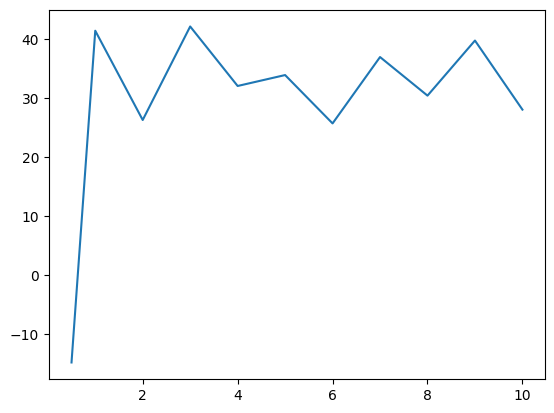

JavaScript
29984
27268


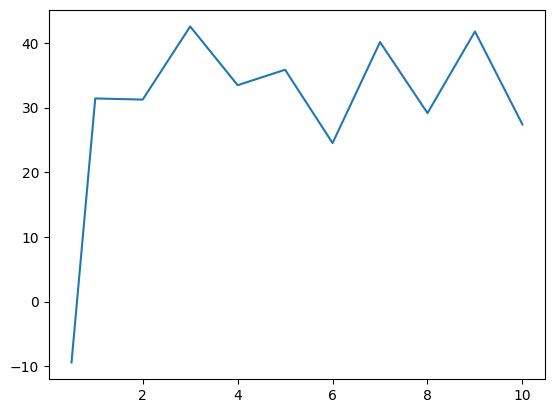

HTML/CSS
26869
23765


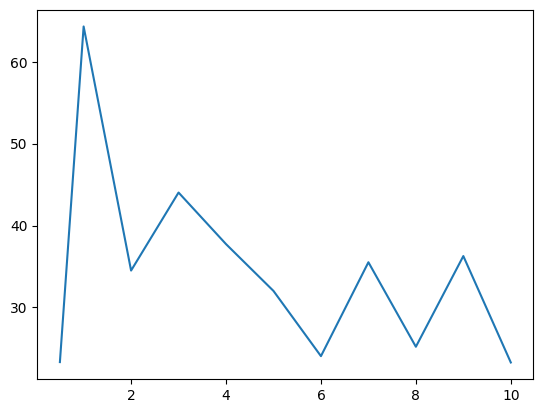

SQL
20028
18656


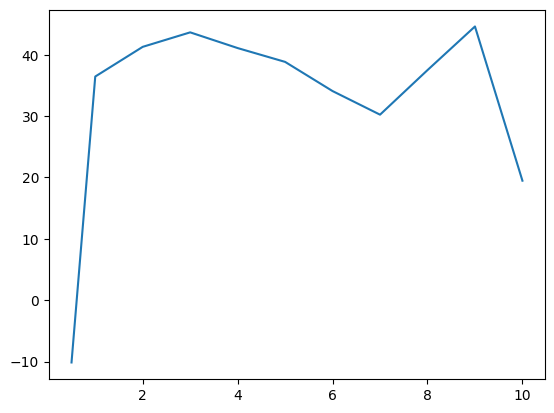

Python
24436
21453


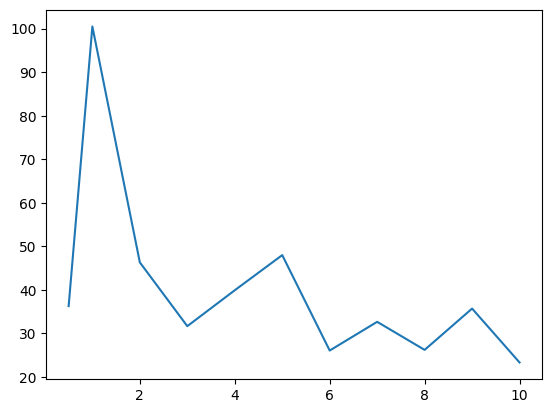

TypeScript
13004
13968


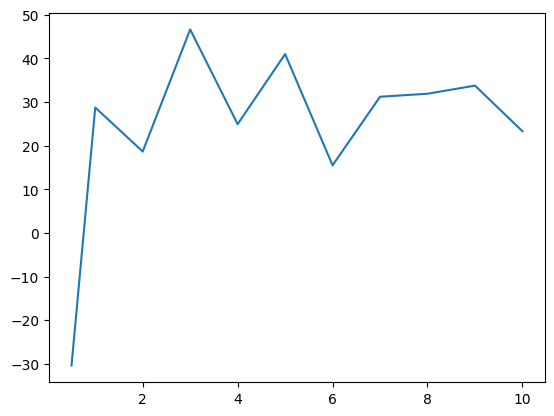

Bash/Shell
10368
10087


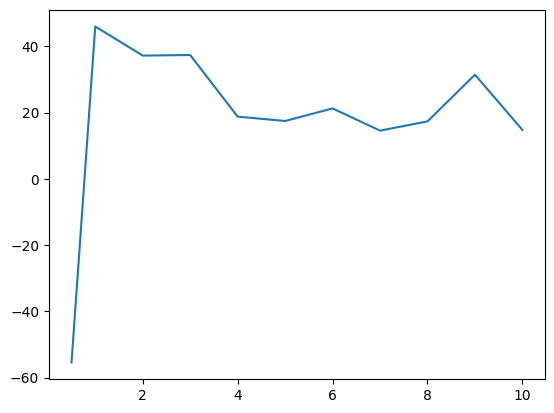

C#
11593
10275


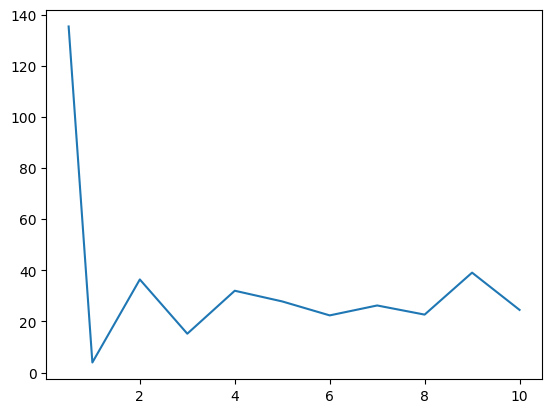

C++
12298
9951


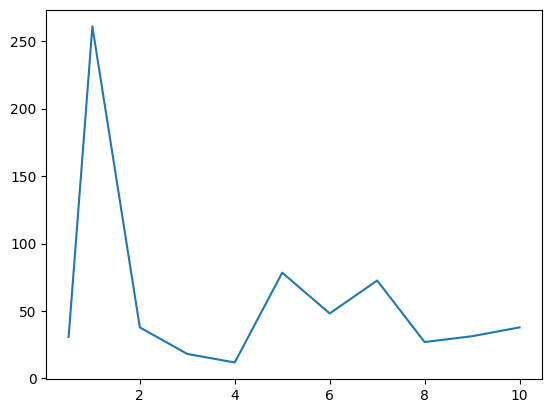

In [60]:
cropped_2022 = crop_dataset(dataset_2022)
cropped_2021 = crop_dataset(dataset_2021)
index = sorted(cropped_2021["YearsCode - Less detailed"].unique())
for language in get_most_popular_languages(dataset)[:10]:
    print(language)
    sub = plt.subplot()
    language_2022 = filter_by_language(cropped_2022, language)
    language_2021 = filter_by_language(cropped_2021, language)
    print(language_2021.shape[0])
    print(language_2022.shape[0])
    salaries = []
    for experience in index:
        salary_2021 = language_2021[language_2021["YearsCode - Less detailed"] == experience]['ConvertedCompYearly'].median()
        salary_2022 = language_2022[language_2022["YearsCode - Less detailed"] == experience]['ConvertedCompYearly'].median()
        salaries.append(salary_2022 / salary_2021 * 100 - 100)
    sub.plot(index, salaries)
    plt.show()